# Аналитика в авиакомпании

#### Поставленные задачи
Необходимо проанализировать данные об авиаперевозках одной авиакомпании и выявить самые популярные по количеству рейсов города и проанализировать частоту использования разных моделей самолетов.

Выполнение поставленной задачи начнем с проверки данных на корректность, затем выбрем топ-10 городов по количеству рейсов.
Для визулизации полученных результатов построим графики: моделей самолетов и количества рейсов, городов и количества рейсов, топ-10 городов  по количеству выполненных рейсов от общего количества рейсов. Сделаем выводы по каждому из графиков, поясним результат.

### Изучим имеющиеся данные

In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib

In [2]:
# Сохранним представленные данные как два датафрейма df1 и df2
df1 = pd.read_csv('/datasets/query_1.csv')
df2 = pd.read_csv('/datasets/query_3.csv')

In [3]:
# Напишем цикл применяющий к датасетам методы необходимые для изучения данных
files = [df1, df2]
for data in files:
    display (data.info(),
             data.isna().sum(),
             data.describe(),
             data.head(5)
            )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

model             0
flights_amount    0
dtype: int64

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

city               0
average_flights    0
dtype: int64

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Данные представленны в удобном для обработки формате, пропуски отсутствуют, тип данных соответствует имеющимся значениям и корректность типов данных не вызвает сомнений. Дополнительная обработка данных не требуется.

Проанализируем данные авиакомпании для того чтобы понять какие города лидируют по количеству рейсов

In [4]:
# Отсортируем значения представленные в столбце average_flights по убыванию
df2 = df2.sort_values(by='average_flights', ascending=False)

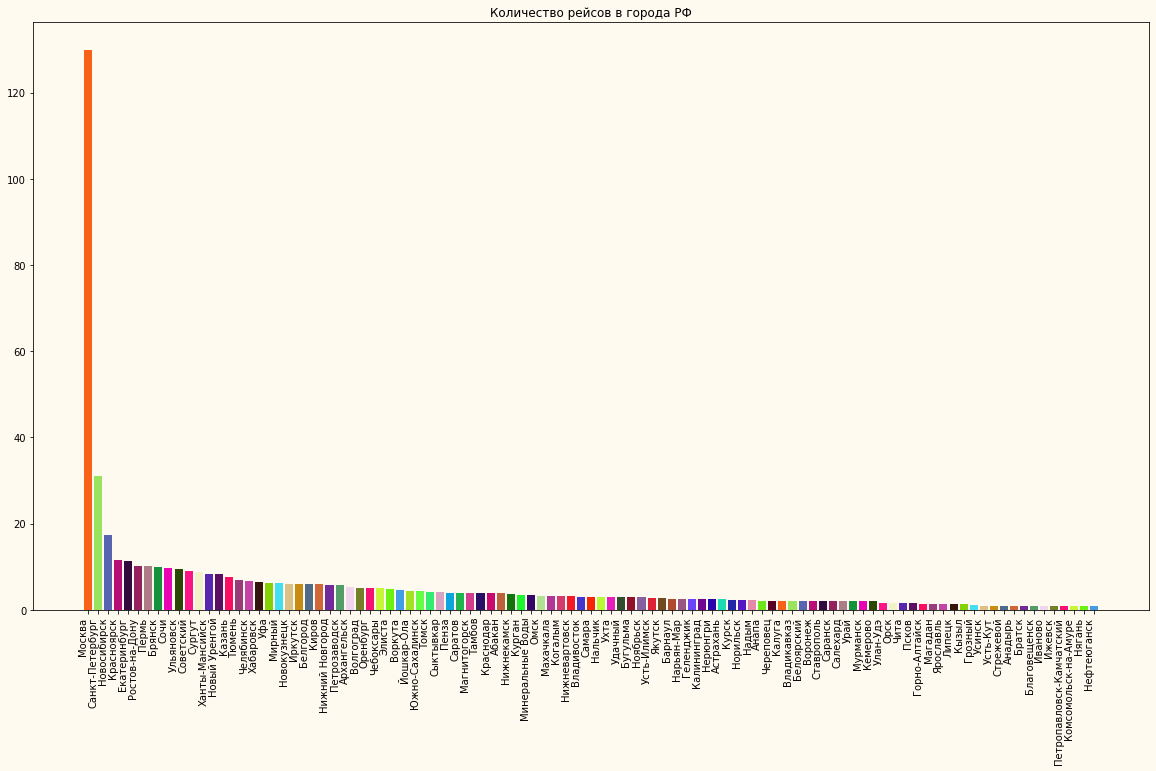

In [5]:
# Построим столбчатую диаграмму
x = df2['city']
y = df2['average_flights']

fig, ax = plt.subplots()

color_rectangle = np.random.rand(69, 3)  
ax.bar(x, y, color = color_rectangle)

fig.set_figwidth(20)   
fig.set_figheight(12)    
fig.set_facecolor('floralwhite')
ax.set_facecolor('floralwhite')
ax.set_title('Количество рейсов в города РФ')
fig.autofmt_xdate(rotation = 90)
plt.show()

На основе данного графика можем сделать следующие выводы:
- По количеству авиарейсов с огромным отрывом лидирует Москва, на данный результат оказывает влияние тот факт, что Москва является главным транспортным узлом нашей страны и значительная часть регионального и международного авиасообщения замыкается именно на этом городе.
- На втором месте расположился Санкт-Петербург, что обусловленно его почти пяти миллионным населением и туристической привлекательностью.
- Остальные города по количеству авиарейсов расположились в порядке сопоставимом с числом жителей в данных городах

Проанализируем подробнее топ 10 городов по числу авиарейсов

In [6]:
# Выведем первую десятку по значению столбца average_flights отсортированного по убванию
display((df2.sort_values(by='average_flights', ascending=False)).head(10))

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


In [7]:
# Десятку замыкает Ульяновск со значением average_flights 9.58, по этому значению и сформируем срез методом query
df2 = df2.query('average_flights >= 9.58')

In [8]:
display(df2)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


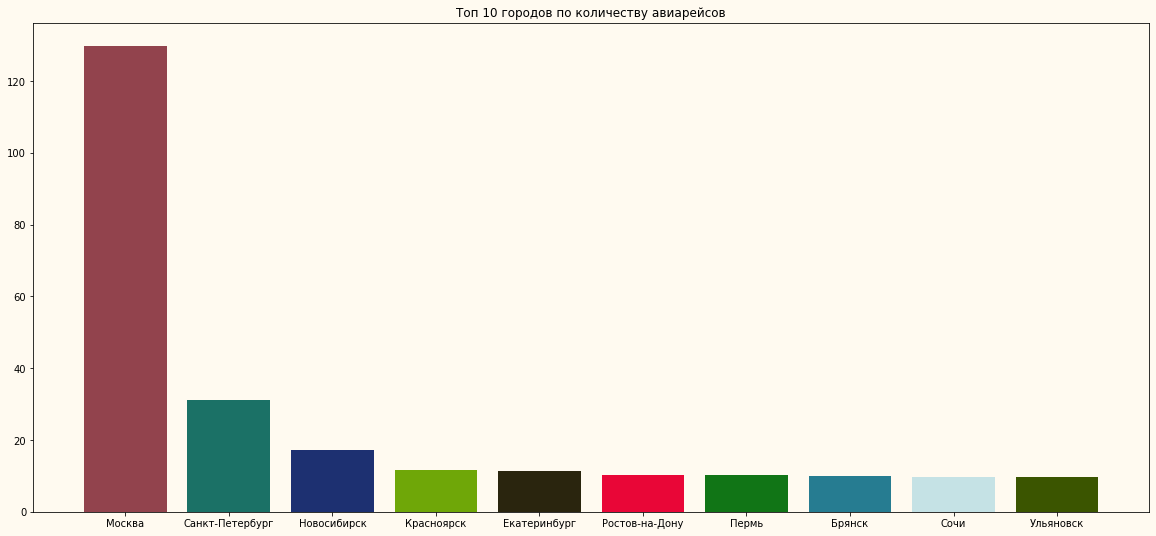

In [9]:
# Построим столбчатую диаграмму
x = df2['city']
y = df2['average_flights']
fig, ax = plt.subplots()
color_rectangle = np.random.rand(10, 3)  
ax.bar(x, y, color = color_rectangle)
fig.set_figwidth(20)   
fig.set_figheight(9)    
fig.set_facecolor('floralwhite')
ax.set_facecolor('floralwhite')
ax.set_title('Топ 10 городов по количеству авиарейсов')
plt.show()

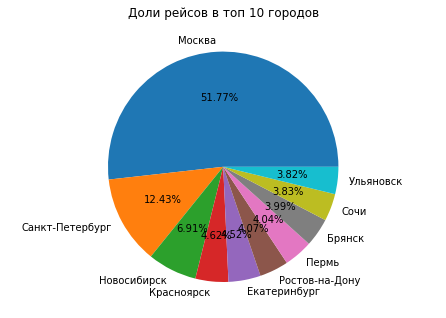

In [10]:
# Построим круговую диаграмму и отобразим на ней доли авиарейсов в процентах
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = df2['city']
flights = df2['average_flights']
ax.pie(flights, labels = langs,autopct='%1.2f%%')
ax.set_title('Доли рейсов в топ 10 городов')
plt.show()

Из представленных 10 гордов с наибольшим числом авиарейсов: 
- Более половины всех рейсов приходится на Москву, что вызванно ее уникальным статуом в системе пасажирского авиасообщения РФ.
- Первые 7 городов представленные в топе являются милионниками
- Топ замыкают Ульяновск, Сочи, Брянск - все эти города обладают числом жителей менее 400 тысяч человек, что выбивается из теории о пропорцианальности числа рейсов количеству жителей.
- Нахождение города Сочи в топе объянимо тем, что представленные данные взяты за летне-осенний период, соответсвтующий пику туристического сезона в Краснодарском крае.
- Присутствие же Уляновска и Брянска можно объяснить проведением в них специфических фестивальных или туристических мероприятий повлиявших на увеличение числа рейсов в данные города.

Проанализируем как распределяется количество рейсов по моделям самолетов их осуществившим

In [11]:
# Отсортируем значения 'flights_amount' по убыванию
df1 = df1.sort_values(by = 'flights_amount', ascending = False)
display(df1)

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


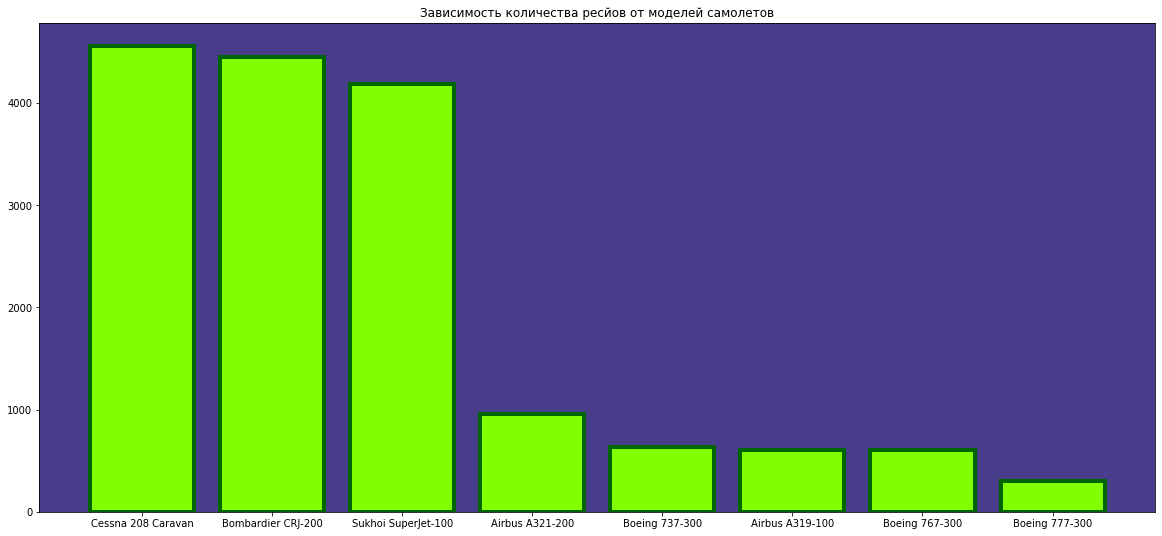

In [12]:
# Построим столбчатую диграмму
x = df1['model']
y = df1['flights_amount']

fig, ax = plt.subplots()
ax.bar(x, y,
       color = 'chartreuse',
       edgecolor = 'darkgreen',
       linewidth = 4)
ax.set_title('Зависимость количества ресйов от моделей самолетов')
fig.set_figwidth(20)    
fig.set_figheight(9)    
ax.set_facecolor('darkslateblue')
plt.show()

- С большим отрывом по количеству осуществленных рейсов лидируют самолеты моделей Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100 существенно превышая по количеству рейсов популярные самолеты марок Boeing и Airbus.
- Самолет модели Cessna 208 Caravan лидирующий по количеству рейсов явлется — американским лёгкий одномоторным турбовинтовым самолётом общего назначения с неубирающимся шасси м возможностью перевозить всего до 13 пассажиров по разрешению FAA. Хотя данная модель самолета, по данным википедии и находится на вооружении у нескольких авиперевозчиков в РФ, учитывая его крайне низкую пасажировместимость, сравнение с самолетами марок Boeing и Airbus представляется не корректным, а реализациия данным самолетом 4557 рейсов на внутренних пассажироперевозках - крайне маловероятной.
- Самолет французкого производителя Bombardier CRJ-200 разместившийся на вотором месте по количеству авиаперевозок, не получил большого распространения в РФ и по данным википедии, макисмальное количество самолетов данной модели сосредоточенное в одной авиакомпании РФ - 18штук. Принимая во внимание допустимую частоту авиасообщения для одного пассажирского борта представляется крайне сомнительным совершение 18ю самолетами 4446 рейсов за представленный промежуток времени, в несколько календарных месяцев.
- Третье место занял самолет марки Sukhoi SuperJet-100, что так же вызвает ряд сомнений в корректности данных. Согласно данным википедии всего выпущенно 200 самолетов данной марки из них эксплутируется лишь 122. Число самолетов способное выполнить заявленное количство рейсов в РФ сосредоточено только в одной авиакомпании и составляет 54штуки, однако на вооружении данной авиакомпании отсутвуют другие наши лидеры рейтинга - Cessna 208 Caravan и Bombardier CRJ-200.
- На основе выше изложенного можно предположить, что данные о количестве рейсов выполненных данными моделями самолетов не верны. Попробуем рассмотреть сложившуюся картину убрав все аномальные и подозрительные данные из датафрейма.

In [13]:
# Сохраним все модели самолетов с аномальными данными в переменную models
models = ["Cessna 208 Caravan", "Bombardier CRJ-200", "Sukhoi SuperJet-100"]

In [14]:
# Сделаем срез для датафрейма по условию исключающему присутсвие моделей перечисленных в перменной models
df1 = df1.query('model != @models')
display(df1)

,model,flights_amount
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


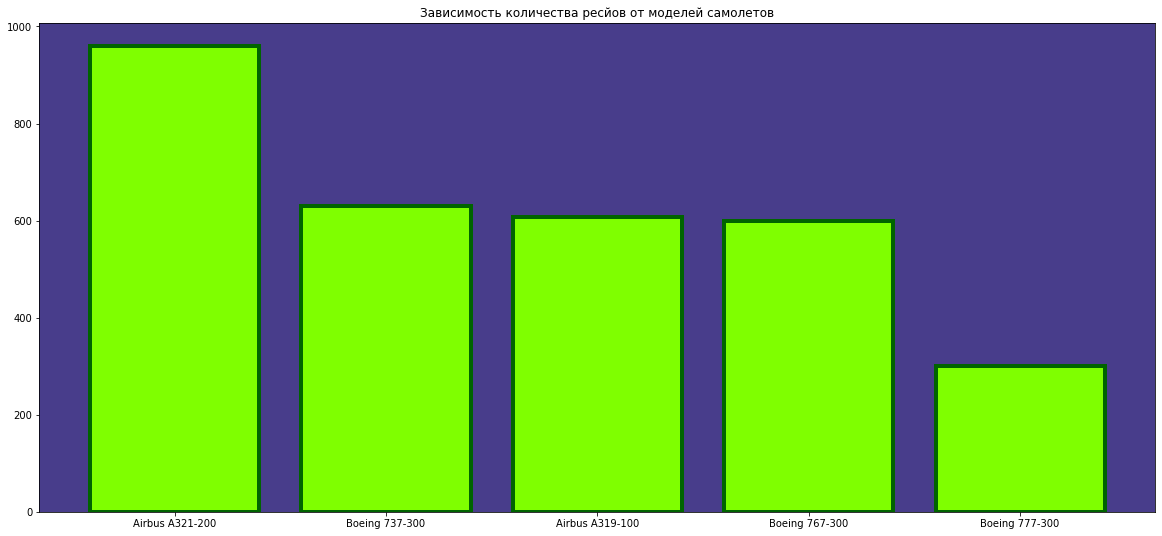

In [15]:
# Построим столбчатую диаграмму без учета аномальных данных
x = df1['model']
y = df1['flights_amount']

fig, ax = plt.subplots()
ax.bar(x, y,
       color = 'chartreuse',
       edgecolor = 'darkgreen',
       linewidth = 4)
ax.set_title('Зависимость количества ресйов от моделей самолетов')
fig.set_figwidth(20)    
fig.set_figheight(9)    
ax.set_facecolor('darkslateblue')
plt.show()

#### Вывод:
Получившиеся значения соответствуют реальной картине распространенности авиасудов в РФ. Наибольшее количество осуществленных перевозок за обозначенные приод у Airbus A321-200, наименьшее с почти трехкратным отстованием у Boeing 777-300. Все представленные модели самолетов являются однотипными, как по числу перевозимых пасажиров, так и по основным летным характеристикам. 

### Общий вывод

На основе всего массива проанализированных данных,  можно выделить следующие выводы:

- Больше половины рейсов данной авиакомпании приходится на Москву.

- Остальной пассажиропоток распределен между городами милионниками и городами с развитой туристической сферой.

- Обнаружена прямая корреляция между числом жителей в городе и количеством авиарейсов.

- Обнаружен ряд аномалий в данных о количестве рейсов выполненных самолетами моделей Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100, о факте искажения данных нужно уведомить представителей авиакомпании.  